In [5]:
import numpy as np 
import pandas as pd 
import os
import pandas as pd
import numpy as np
import seaborn as sns
import os

Format of the file: age_gender_ethnicity_datetime 

In [23]:
import os

path = "/Users/admin/Downloads/crop_part1"

try:
    files = os.listdir(path)
    size = len(files)
    print("Total samples:", size)
    if size > 0:
        print("First file:", files[0])
    else:
        print("No files found in the directory.")
except FileNotFoundError:
    print("Directory not found.")
except Exception as e:
    print("An error occurred:", str(e))


Total samples: 9780
First file: 9_1_2_20161219204347420.jpg.chip.jpg


Gender: Female Age: 5


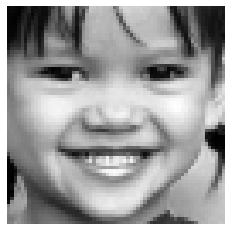

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

data = {
    "images": [],
    "ages": [],
    "genders": []
}

directory = '/Users/admin/Downloads/crop_part1'  # Update the directory path accordingly

# Iterate over files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        file_path = os.path.join(directory, filename)
        image = cv2.imread(file_path, 0)
        if image is not None:
            image = cv2.resize(image, dsize=(64, 64))
            image = image.reshape((image.shape[0], image.shape[1], 1))
            data["images"].append(image)
            split_var = filename.split('_')
            data["ages"].append(int(split_var[0]))
            data["genders"].append(int(split_var[1]))

def display(img):
    plt.imshow(img[:, :, 0], cmap='gray')  # Set the color map to gray
    plt.axis('off')  # Turn off axis ticks and labels
    plt.show()

idx = 500
sample = data["images"][idx]
print("Gender:", "Male" if data["genders"][idx] == 0 else "Female", "Age:", data["ages"][idx])
display(sample)


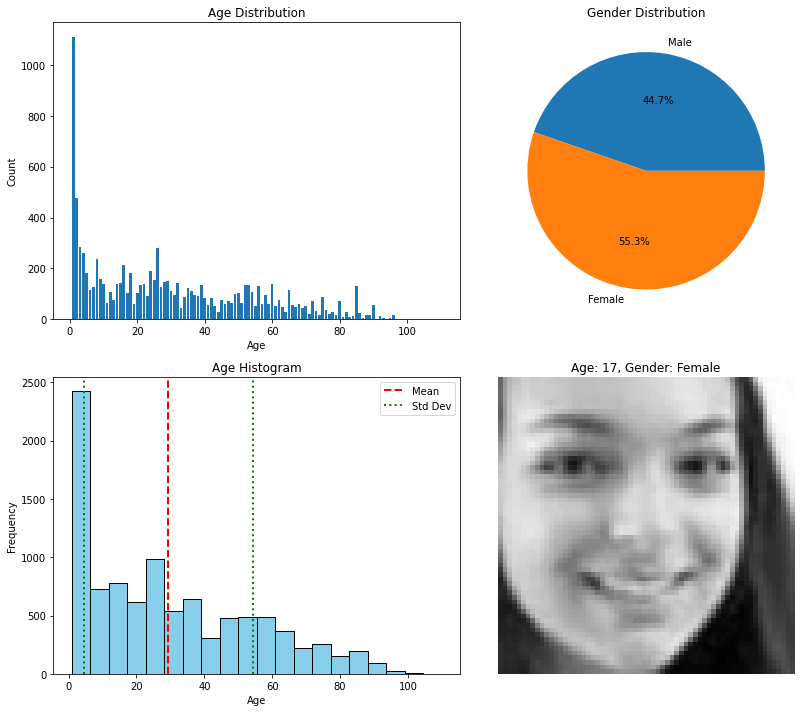

Max age value: 110


In [20]:
data = {
    "images": [],
    "ages": [],
    "genders": []
}

directory = '/Users/admin/Downloads/crop_part1'  # Update the directory path accordingly

# Iterate over files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        file_path = os.path.join(directory, filename)
        image = cv2.imread(file_path, 0)
        if image is not None:
            image = cv2.resize(image, dsize=(64, 64))
            image = image.reshape((image.shape[0], image.shape[1], 1))
            data["images"].append(image)
            split_var = filename.split('_')
            data["ages"].append(int(split_var[0]))
            data["genders"].append(int(split_var[1]))

# Plot age distribution using a bar plot
x_ages = list(set(data["ages"]))
y_ages = [data["ages"].count(i) for i in x_ages]

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Bar plot for age distribution
axs[0, 0].bar(x_ages, y_ages)
axs[0, 0].set_title("Age Distribution")
axs[0, 0].set_xlabel("Age")
axs[0, 0].set_ylabel("Count")

# Plot 2: Pie chart for gender distribution
gender_counts = [data["genders"].count(0), data["genders"].count(1)]
gender_labels = ["Male", "Female"]
axs[0, 1].pie(gender_counts, labels=gender_labels, autopct="%1.1f%%")
axs[0, 1].set_title("Gender Distribution")

# Plot 3: Histogram of ages
axs[1, 0].hist(data["ages"], bins=20, color='skyblue', edgecolor='black')
axs[1, 0].set_title("Age Histogram")
axs[1, 0].set_xlabel("Age")
axs[1, 0].set_ylabel("Frequency")

# Calculate and display age statistics
age_mean = np.mean(data["ages"])
age_std = np.std(data["ages"])
axs[1, 0].axvline(age_mean, color='r', linestyle='dashed', linewidth=2, label='Mean')
axs[1, 0].axvline(age_mean - age_std, color='g', linestyle='dotted', linewidth=2, label='Std Dev')
axs[1, 0].axvline(age_mean + age_std, color='g', linestyle='dotted', linewidth=2)
axs[1, 0].legend()

# Plot 4: Display sample images with age and gender information
sample_indices = np.random.choice(len(data["images"]), size=min(4, len(data["images"])), replace=False)
for i, idx in enumerate(sample_indices):
    ax = axs[1, 1]
    ax.imshow(data["images"][idx].reshape((64, 64)), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Age: {data['ages'][idx]}, Gender: {'Male' if data['genders'][idx] == 0 else 'Female'}")

plt.tight_layout()
plt.show()

# Display maximum age value
print("Max age value:", max(data["ages"]))


In [18]:
data = {
    "images": [],
    "ages": [],
    "genders": []
}

directory = '/Users/admin/Downloads/crop_part1'  # Update the directory path accordingly

# Iterate over files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        file_path = os.path.join(directory, filename)
        image = cv2.imread(file_path, 0)
        if image is not None:
            image = cv2.resize(image, dsize=(64, 64))
            image = image.reshape((image.shape[0], image.shape[1], 1))
            data["images"].append(image)
            split_var = filename.split('_')
            data["ages"].append(split_var[0])
            data["genders"].append(int(split_var[1]))

# Now you can access the data using the 'data' dictionary
print("Total samples:", len(data["images"]))
print("Sample age:", data["ages"][0])
print("Sample gender:", data["genders"][0])


Total samples: 9780
Sample age: 9
Sample gender: 1


In [29]:
import numpy as np

def custom_train_test_split(features, target, test_size=0.2, random_seed=None):
    # Set a random seed for reproducibility if provided
    if random_seed is not None:
        np.random.seed(random_seed)

    # Shuffle the indices to randomize the data
    indices = np.random.permutation(len(features))
    split_index = int(len(features) * (1 - test_size))

    # Split the indices into training and testing sets
    train_indices, test_indices = indices[:split_index], indices[split_index:]

    # Split the data based on the indices
    x_train, x_test = features[train_indices], features[test_indices]
    y_train, y_test = target[train_indices], target[test_indices]

    return x_train, x_test, y_train, y_test

# Using the custom_train_test_split method
x_train, x_test, y_train, y_test = custom_train_test_split(features, target, test_size=0.2, random_seed=42)

# Displaying the number of samples in the training and testing sets
print("Samples in Training:", x_train.shape[0])
print("Samples in Testing:", x_test.shape[0])


Samples in Training: 7824
Samples in Testing: 1956


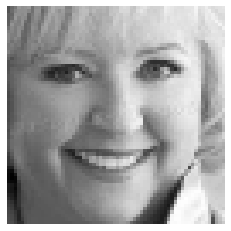

Gender: Female Age Group: 3


In [26]:
import numpy as np

def age_group(age):
    if age >= 0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

# pre processing
size = len(data["images"])  # Use the size from the data dictionary
target = np.zeros((size, 2), dtype='float32')
features = np.zeros((size, data["images"][0].shape[0], data["images"][0].shape[1], 1), dtype='float32')
for i in range(size):
    target[i, 0] = age_group(int(data["ages"][i])) / 4
    target[i, 1] = int(data["genders"][i])
    features[i] = data["images"][i]
features = features / 255

# Change the index to display a different image
display_index = 550
display(features[display_index] * 255)  # Multiply by 255 to revert normalization
print("Gender:", "Male" if target[display_index, 1] == 0 else "Female", "Age Group:", int(target[display_index, 0] * 4))


In [27]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True)

# Displaying the number of samples in the training and testing sets
print("Samples in Training:", x_train.shape[0])
print("Samples in Testing:", x_test.shape[0])
print("Shape of image:",sample.shape)

Samples in Training: 7824
Samples in Testing: 1956
Shape of image: (64, 64, 1)


In [54]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def binary_crossentropy(y_true, y_pred):
    epsilon = 1e-15  # Small constant to avoid division by zero
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predictions to prevent log(0) error
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Define the architecture of the model
def create_model():
    model = {}
    model['W1'] = np.random.randn(64 * 64, 128) * 0.01
    model['b1'] = np.zeros((1, 128))
    model['W2'] = np.random.randn(128, 64) * 0.01
    model['b2'] = np.zeros((1, 64))
    model['W3'] = np.random.randn(64, 2) * 0.01
    model['b3'] = np.zeros((1, 2))
    return model

def forward_propagation(X, model):
    Z1 = np.dot(X, model['W1']) + model['b1']
    A1 = relu(Z1)
    Z2 = np.dot(A1, model['W2']) + model['b2']
    A2 = relu(Z2)
    Z3 = np.dot(A2, model['W3']) + model['b3']
    A3 = sigmoid(Z3)
    return A1, A2, A3

def train_model(X, y, model, learning_rate, epochs, batch_size):
    m = X.shape[0]

    for epoch in range(epochs):
        for batch_start in range(0, m, batch_size):
            batch_end = min(batch_start + batch_size, m)
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]

            # Forward propagation
            A1, A2, A3 = forward_propagation(X_batch, model)

            # Compute loss and gradients
            loss = binary_crossentropy(y_batch, A3)
            dZ3 = A3 - y_batch
            dW3 = np.dot(A2.T, dZ3) / batch_size
            db3 = np.sum(dZ3, axis=0, keepdims=True) / batch_size
            dA2 = np.dot(dZ3, model['W3'].T)
            dZ2 = dA2 * (A2 > 0)
            dW2 = np.dot(A1.T, dZ2) / batch_size
            db2 = np.sum(dZ2, axis=0, keepdims=True) / batch_size
            dA1 = np.dot(dZ2, model['W2'].T)
            dZ1 = dA1 * (A1 > 0)
            dW1 = np.dot(X_batch.T, dZ1) / batch_size
            db1 = np.sum(dZ1, axis=0, keepdims=True) / batch_size

            # Update model parameters
            model['W3'] -= learning_rate * dW3
            model['b3'] -= learning_rate * db3
            model['W2'] -= learning_rate * dW2
            model['b2'] -= learning_rate * db2
            model['W1'] -= learning_rate * dW1
            model['b1'] -= learning_rate * db1

    return model

# Assuming x_train, x_test, y_train, and y_test are already defined and contain the data
model = create_model()
learning_rate = 0.01
epochs = 10
batch_size = 32

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=42)
model = train_model(x_train.reshape(-1, 64 * 64), y_train, model, learning_rate, epochs, batch_size)

# Test the model on the test data
_, _, y_pred = forward_propagation(x_test.reshape(-1, 64 * 64), model)
test_loss = binary_crossentropy(y_test, y_pred)
test_accuracy = np.mean((y_pred >= 0.5) == y_test)  # Calculate accuracy

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.6484781912950428
Test Accuracy: 0.34151329243353784
